# Support Vector Machine (SVM)

Support Vector Machines (SVM) is a supervised machine learning algorithm that is used for classification as well as regression challenges. It works by finding the hyperplane that best divides a dataset into classes.

## Importing Libraries

We start by importing the necessary libraries.

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



## Visualization of Decision Boundary

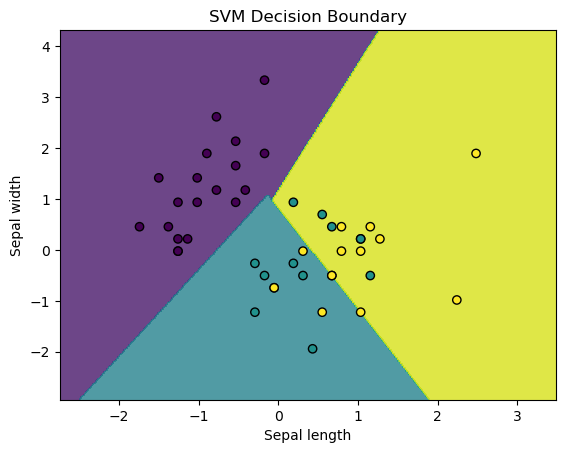

In [10]:

# Plotting the decision boundary for SVM

def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_test, y_test, svm)
